In [1]:
from scipy import misc
import matplotlib.pyplot as plt
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage import gaussian_filter, gaussian_filter1d
import numpy as np

from PIL import ImageFilter

In [8]:
def image_splitting(img, box_size, h_rate=.5, w_rate=.5):
    
    img = np.array(img)
    
    h = int(np.floor(img.shape[0]/box_size)*box_size)
    w = int(np.floor(img.shape[1]/box_size)*box_size)
    
    img = img[:h, :w,:]
    
    h_split_no = int(h/box_size-1)
    w_split_no = int(w/box_size-1)
    
    h_split_width = int(np.ceil(box_size*h_rate))
    w_split_width = int(np.ceil(box_size*w_rate))

    splited_img = np.ones((h+h_split_no*h_split_width, w+w_split_no*w_split_width,3))*255
    
    for i in range(h_split_no+1):
        for j in range(w_split_no+1):
            splited_img[i*(box_size+h_split_width):i*(box_size+h_split_width)+box_size,
                       j*(box_size+w_split_width):j*(box_size+w_split_width)+box_size,:]=img[i*box_size:i*box_size+box_size, j*box_size:j*box_size+box_size,:]
            
    
    return misc.toimage(splited_img)

def image_blurring(img, box_size, clear_rate=0, m='gaussian', sigma=5):
    h = int(np.floor(img.shape[0]/box_size)*box_size)
    w = int(np.floor(img.shape[1]/box_size)*box_size)
    
    img = img[:h, :w,:]
    
    h_box_no = int(h/box_size)
    w_box_no = int(w/box_size)
    
    blur_img = np.zeros(img.shape)
    
    for i in range(h_box_no):
        for j in range(w_box_no):
            box_start_i = i*box_size
            box_start_j = j*box_size
            
            if np.random.uniform()>=clear_rate:
                if m=='avg':
                    avg_channel = np.zeros(3)
                    for ii in range(box_start_i, box_start_i+box_size):
                        for jj in range(box_start_j, box_start_j+box_size):
                            avg_channel = avg_channel+img[ii, jj,:]
                    avg_channel = avg_channel/(box_size*box_size)
                    for ii in range(box_start_i, box_start_i+box_size):
                        for jj in range(box_start_j, box_start_j+box_size):
                            blur_img[ii, jj] = avg_channel
                elif m=='gaussian':
                    blur_img[box_start_i:box_start_i+box_size,box_start_j:box_start_j+box_size, 0]=gaussian_filter(img[box_start_i:box_start_i+box_size,box_start_j:box_start_j+box_size, 0], sigma=sigma)
                    blur_img[box_start_i:box_start_i+box_size,box_start_j:box_start_j+box_size, 1]=gaussian_filter(img[box_start_i:box_start_i+box_size,box_start_j:box_start_j+box_size, 1], sigma=sigma)
                    blur_img[box_start_i:box_start_i+box_size,box_start_j:box_start_j+box_size, 2]=gaussian_filter(img[box_start_i:box_start_i+box_size,box_start_j:box_start_j+box_size, 2], sigma=sigma)
                

            else:
                blur_img[box_start_i:box_start_i+box_size,box_start_j:box_start_j+box_size]=img[box_start_i:box_start_i+box_size,box_start_j:box_start_j+box_size]
    return misc.toimage(blur_img)

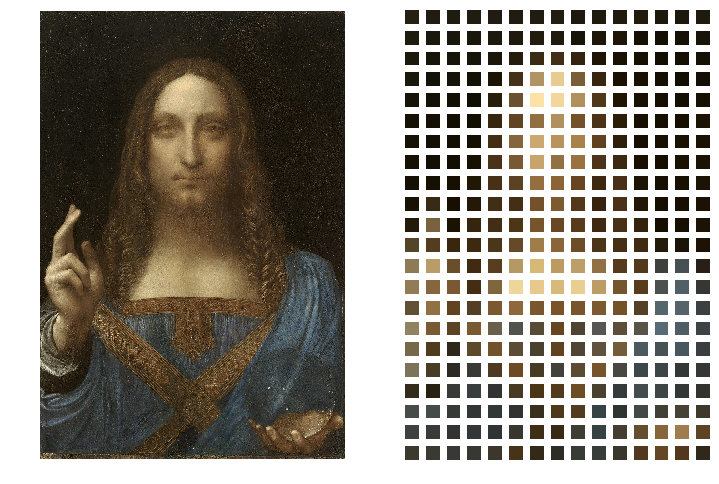

In [9]:
# avg bluring mode

img = misc.imread('salvator_mundi.jpg')

box_size = 80

new_img = image_blurring(img, box_size, m='avg')

new_img = image_splitting(new_img, box_size, h_rate=.5, w_rate=.5)

plt.figure(figsize=(12,10))
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.subplot(122)
plt.imshow(new_img)
plt.axis('off')
plt.show()

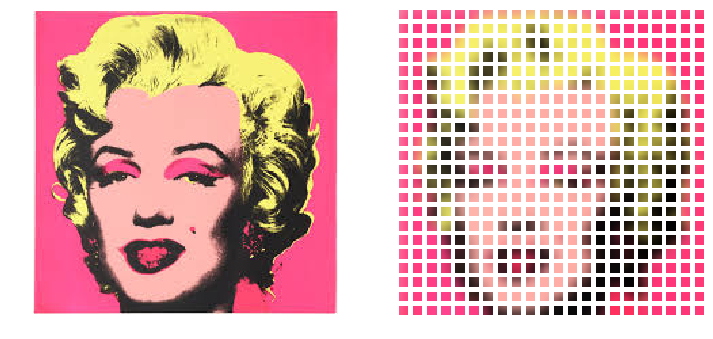

In [12]:
# gaussian bluring mode

img = misc.imread('andy.jpeg')

box_size = 20

new_img = image_blurring(img, box_size, m='gaussian', sigma=5)

new_img = image_splitting(new_img, box_size, h_rate=.5, w_rate=.5)

plt.figure(figsize=(12,10))
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.subplot(122)
plt.imshow(new_img)
plt.axis('off')
plt.show()